In [204]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt 

def sigmoid(z):
    return 1.0/(1+np.exp(-z))


def logistic_regression(X,y,weights,learning_rate,iteral,tol = 1e-4):
    w = [weights]
    N = X.shape[1]
    d = X.shape[0]
    count = 0 
    check = 20
    while count < iteral:
        mix_id = np.random.permutation(N) # tạo hoán vị các đặc trưng
        for i in mix_id:
            xi = X[:,i].reshape(d,1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T,xi))
            w_new = w[-1] + learning_rate*(yi-zi)*xi
            count+=1
            # điều kiện dừng
            if count % check == 0:
                if np.linalg.norm(w_new - w[-check])<tol:
                    return w
            w.append(w_new)
    return w            



In [209]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
# plt.scatter(X,y,marker = 'o', c = 'b')
# plt.show()
X = np.concatenate((np.ones((1,X.shape[1])),X),axis = 0)
print(X.shape)
learning_rate = .05
iteral = 1000
d = X.shape[0]
weights = np.random.randn(d, 1)
print(weights)

w = logistic_regression(X,y,weights,learning_rate,iteral)
print(w[-1])
print(sigmoid(np.dot(w[-1].T,X)))


(2, 20)
[[ 0.18511781]
 [-0.97420913]]
[[-2.80867835]
 [ 1.09492932]]
[[0.09438657 0.12052358 0.15267808 0.19154276 0.23752726 0.29058346
  0.29058346 0.35004994 0.41457422 0.4821688  0.55042234 0.6168288
  0.67914426 0.73566824 0.82793167 0.86351202 0.89268866 0.91623333
  0.93498839 0.96133666]]


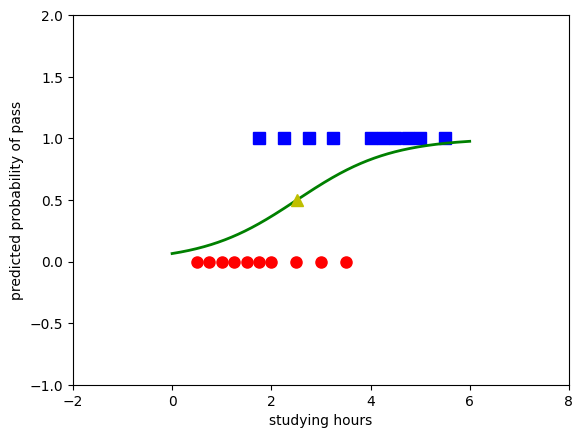

In [208]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()